<img src="./img/oscon.png" width="400">

In [2]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics, preprocessing
import matplotlib.pyplot as plt
tf.__version__

'0.12.0'


# Computational graphs
In TensorFlow, each of the graph's nodes represent an operation, possibly applied to some input, and can generate an output that is passed on to other nodes. 



# Graph examples


Operations in the graph include all kinds of functions, from simple arithmetic ones such as subtraction and multiplication, to more complex ones as we will see later on. They also include more general operations like the creation of constant values.

Creating operations is simple:
~~~python 
tf.<node does what> 
~~~

# Fibonacci sequence
# $$F_n=F_{n-1}+ F_{n-2}$$
## $$F_0 = 0, F_1 = 1 $$

<img src="./img/fibonacci.png" width="800">

In [1]:
import tensorflow as tf # A default graph was created!

a = tf.constant(0) # input of 0
b = tf.constant(1) # input of 1
c = tf.add(a,b) # 1
d = tf.add(b,c) # 2
e = tf.add(c,d) # 3
f = tf.add(d,e) # 5

sess = tf.Session()
outs = sess.run(f)
sess.close()

print 'Output is {}'.format(outs)

Output is 5


# Weighted sum
# $$y=w_0x_0+w_1x_1+w_2x_2$$

<img src="./img/1d_filter.png" width="600">

In [13]:
x_0 = tf.constant(2) 
x_1 = tf.constant(-3) 
x_2 = tf.constant(2) 

w_0 = tf.constant(4) 
w_1 = tf.constant(7) 
w_2 = tf.constant(-5) 

wx_0 = tf.multiply(x_0,w_0) # x_0*w_0
wx_1 = tf.multiply(x_1,w_1) # x_1*w_1
wx_2 = tf.multiply(x_2,w_2) # x_2*w_2

wx_0_1 = tf.add(wx_0,wx_1) # -wx_0 + wx_1
wx_0_1_2 = tf.add(wx_0_1,wx_2) # wx_0_1 + wx_2


sess = tf.Session()
outs = sess.run(wx_0_1_2)
sess.close()

print 'Output is {}'.format(outs)

Output is -23


Working with TensorFlow involves two main phases: constructing a graph and executing it.


# Session
Session object is the part of the TensorFlow API that communicates between
Python objects and data on our end, and the actual computational system where
memory is allocated for the objects we define, intermediate variables are stored, and
finally results are fetched for us.

In [172]:
# Graph architecture
a = tf.constant(0) # input of 0
b = tf.constant(1) # input of 1
c = tf.add(a,b) # 1
d = tf.add(b,c) # 2
e = tf.add(c,d) # 3
f = tf.add(d,e) # 5

### Option 1:

~~~python 
tf.Session()
~~~

In [176]:
# Start a session and run
# option 1

sess = tf.Session()
outs = sess.run(f)
sess.close()

print 'Output is {}'.format(outs)

Output is 5


### Option 2:

~~~python 
with tf.Session()
~~~

In [174]:
# option 2

with tf.Session() as sess:
    outs = sess.run(f)

print 'Output is {}'.format(outs)

Output is 5


### Option 3:

~~~python 
tf.InteractiveSession()
~~~

In [175]:
# option 3

sess = tf.InteractiveSession()
outs = sess.run(f)
sess.close()

print 'Output is {}'.format(outs)

Output is 5


# NumPy
NumPy is a popular and useful Python package for numerical computing. The two packages - TensorFlow and NumPy are tightly coupled - for example, the output returned by sess.run() is a NumPy array. 

In [121]:
a = np.array([[1,2],[3,4],[5,6]])
print('array a:\n{}'.format(a))
print('==============================')
# in numpy we use shape instead of len as with a regular python list
print('shape of a:\n{}'.format(a.shape))

array a:
[[1 2]
 [3 4]
 [5 6]]
shape of a:
(3, 2)


# Fetches
We can ask the sess.run() command for
other node outputs simply by inputting a list of requested nodes. The argument we
use for this request is called the ‘fetches’ argument.

In [179]:
sess = tf.Session()
fetches = [a,b,c,d,e,f]
outs = sess.run(fetches)
sess.close()

print 'Output is {}'.format(outs)
print type(outs)
print type(outs[0])

Output is [0, 1, 1, 2, 3, 5]
<type 'list'>
<type 'numpy.int32'>


# Hands-on .1

<img src="./img/hands_on_1.png" width="6000">

# tensor arrays

In [112]:
# 3d array
a = np.array([ 
            [[1,2,3],\
             [1,2,3],\
             [1,2,3]],\
        
              [[3,2,1],\
               [3,2,1],\
               [3,2,1]] 
             ])
print a.shape

(2, 3, 3)


# shape, dtype and name

In [210]:
a = [[1,2],[3,4]]
# Assigning attributes explicitly
x = tf.constant(a,name='a',dtype=tf.float32) 

In [114]:
print(x.get_shape())

(2, 2)


Tensor names are generated from the name of the operation that produces them (a Variable op in this case) and the index of the output to which that tensor corresponds.

In [115]:
print(x.name)

a_1:0


It's important to make sure our data types
match throughout the graph — performing an operation with two non-matching
data types will result in an exception.

In [211]:
print(x.dtype)

<dtype: 'float32'>


## Cast
Casts a tensor to a new type.

In [216]:
x = tf.cast(x,np.int64)
print(x.dtype)

<dtype: 'int64'>


# Name scopes
Sometimes when dealing with large complicated graphs, we would like to create some node grouping to make it easier to follow and manage. 

In [117]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c') 
        c3 = tf.constant(4,dtype=tf.float64,name='c')

print c1.name
print c2.name
print c3.name

c:0
prefix_name/c:0
prefix_name/c_1:0


# Initializers

# Constant and random Initializers 

In [123]:
sess = tf.InteractiveSession()

a = np.array([[1,2],[3,4],[5,6]])

x = tf.constant(a)
print('constant initializer:\n {}').format(x.eval())

constant initializer:
 [[1 2]
 [3 4]
 [5 6]]


In [124]:
x = tf.fill(a.shape,1)
print('fill initializer:\n {}').format(x.eval())

fill initializer:
 [[1 1]
 [1 1]
 [1 1]]


In [125]:
x = tf.zeros(a.shape)
print('fill initializer:\n {}').format(x.eval())


fill initializer:
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [131]:

# === Noramal and Truncated normal distributions ===
mean = 0
std = 1
x_normal = tf.random_normal((1,50000),mean,std).eval()
x_truncated = tf.truncated_normal((1,50000),mean,std).eval()

# === Uniform distribution
minval = -2 
maxval = 2
x_uniform = tf.random_uniform((1,50000),minval,maxval).eval()

session.close()



(1, 50000)


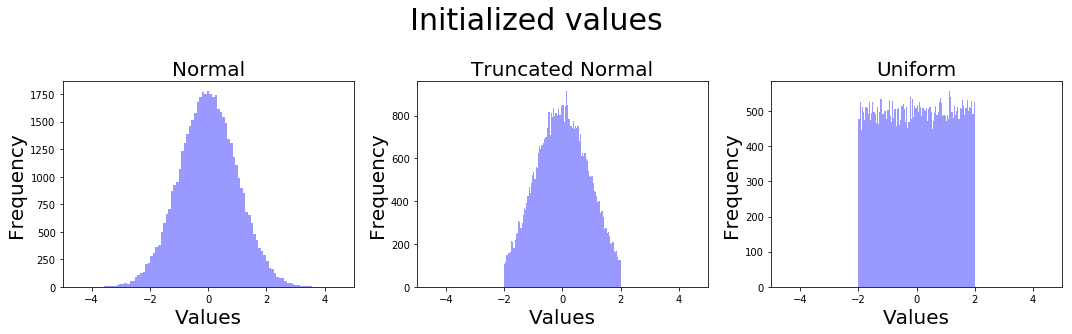

In [132]:
f,axarr = plt.subplots(1,3,figsize=[15,4])
titles = ['Normal','Truncated Normal','Uniform']

print(x_normal.shape)
for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0],bins=100,color='b',alpha=0.4)
    ax.set_title(titles[i],fontsize=20)
    ax.set_xlabel('Values',fontsize=20)
    ax.set_ylabel('Frequency',fontsize=20)
    ax.set_xlim([-5,5])
plt.suptitle('Initialized values',fontsize=30, y=1.15)
plt.tight_layout()
plt.show()

# Useful operations

## Reduce
Operations that you can use to perform common math computations that reduce various dimensions of a tensor
~~~python 
tf.reduce_mean()
tf.reduce_sum()
tf.reduce_min()
tf.reduce_max()
tf.reduce_prod()
tf.reduce_mean()

~~~


In [230]:
sess = tf.InteractiveSession()

a = tf.constant([ [1,2,3],
              [4,5,6] ])

x = tf.reduce_max(a)
print('maximum value:\n {}').format(x.eval())

maximum value:
 6


~~~python 
reduction_indices
~~~
Is the dimensions to reduce. If None (the default), reduces all dimensions

In [231]:
x = tf.reduce_max(a,reduction_indices=0)
print('maximum column values:\n {}').format(x.eval())

maximum column values:
 [4 5 6]


In [232]:
x = tf.reduce_max(a,reduction_indices=1)
print('maximum row values:\n {}').format(x.eval())

maximum row values:
 [3 6]


## matmul, expand_dims and transpose

In [245]:
a = tf.constant([ [1,2,3],
              [4,5,6] ])

b = tf.constant([1,0,1])

# print('maximum value:\n {}').format(x.eval())

In [242]:
print(a.get_shape())
print(b.get_shape())

(2, 3)
(3,)


In [246]:
b = tf.expand_dims(b,0)
print(b.get_shape())

(1, 3)


In [248]:
x = tf.matmul(a,tf.transpose(b))
print('matmul result:\n {}').format(x.eval())

matmul result:
 [[ 4]
 [10]]


# Hands-on .2

<img src="./img/hands_on_2_a.png" width="500">

# Variables
Variables, unlike other Tensor objects that are “refilled” across calls to run(), can maintain a fixed state in the graph.

In [189]:
c = tf.constant(15, name='c')
x = tf.Variable(c*5, name='x')
init = tf.global_variables_initializer()
print('pre-run variable:\n{}'.format(x))
print('===============================')
with tf.Session() as sess:
    sess.run(init)
    val = sess.run(x)
    print('pre-run variable:\n{}'.format(val))


pre-run variable:
Tensor("x_2/read:0", shape=(), dtype=int32)
pre-run variable:
75


we have to explicitly perform an initialization operation by running the session with the tf.initialize_all_variables() method, which allocates the memory for the variable and sets
the initial value.

# Variable sharing

It's possible to reuse the same variables by applying tf.get_variables() instead of tf.Variable(). We use it very similarly to tf.Variable(), only that we need to pass the value through an initializer and not directly.

# Placeholders

TensorFlow has designated built-in structures for feeding input values. Placeholders can be thought of as empty variables that will be filled with data later on. We use them by first constructing our graph and only
when it is executed feed them with the input data.


# Feeds

TensorFlow's feed mechanism lets you inject data into any Tensor in a computation graph. A python computation can thus feed data directly into the graph. The input data is given as a dictionary, where each key corresponds to a placeholder variable name, and the matching values are the data values given in the form of a list or a numpy array. 

In [139]:
x_data = np.random.randn(100,10)
y_data = np.random.randn(100)

with tf.Graph().as_default():
    x = tf.placeholder(np.float32,shape=(None,10))
    y = tf.placeholder(np.float32,shape=(None))
    with tf.Session() as sess:
        outs = sess.run(x,feed_dict={x: x_data,y: y_data})
        
print(outs.shape)

(100, 10)


# Optimization

Our training data points will be used for "tuning" the model so that it best captures the relation between our feature vectors x and our target y.

<img src="./img/optimization.png" width="600">

# Defining a loss function
To capture the discrepancy between our model’s predictions and observed targets, we need a measure that reflects the “distance” between the observed y and predicted y. This distance is often referred to as a “loss” function, and we optimize the model by finding the set of parameters (weights) that minimize it.


### Least squares
(Linear Regression likelihood):

# $$L(y,\hat{y})=\Sigma_i(y_i-\hat{y}_i)^2$$

~~~python 
loss = tf.reduce_mean(tf.square(y_true-y_pred))
~~~


### Cross entropy (classification problems)
(Logistic Regression likelihood):

# $$H(p,q)=-\Sigma_x{p(x) \log q(x)}$$

~~~python 

loss = - y_true * tf.log(tf.sigmoid(y_pred)) - (1.0 - y_true) * tf.log(1.0 - tf.sigmoid(y_pred))
### instead we can use
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred) 

loss = tf.reduce_mean(loss)
~~~


# Denfining an optimizer
Optimizers update the set of weights iteratively in a way that lowers the loss over time.
We first create an optimizer function with the desired parameters, such as the learning rate. We then create a train operation that updates our variables and pass in the loss as an argument. 

~~~python 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(loss)
~~~

# Optimization example
## Logistic regression:

# $$Pr(y_i=1|x_i)={1\over{1+\exp^{wx_i+b}} }$$


In [3]:
N = 10000

# generate data

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# === Create data and simulate results =====
x_data = np.random.randn(N,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
wxb = np.matmul(w_real,x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)
y_data = np.random.binomial(1,y_data_pre_noise)

<img src="./img/logistic_reg.png" width="700">

In [185]:
# === Estimate weights =====
g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=(None,3))
    y_true = tf.placeholder(tf.float32,shape=(None))

    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
    
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred) 
        loss = tf.reduce_mean(loss)

    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(50):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 4) or (step == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

0 [array([[ 0.03328711,  0.059005  ,  0.01087413]], dtype=float32), -0.026299978]
4 [array([[ 0.12999323,  0.23086172,  0.04243677]], dtype=float32), -0.10251139]
9 [array([[ 0.19891457,  0.35390699,  0.06483841]], dtype=float32), -0.15641923]
14 [array([[ 0.23727539,  0.42272067,  0.07720824]], dtype=float32), -0.18605825]
19 [array([[ 0.25936091,  0.46250927,  0.08426124]], dtype=float32), -0.20288409]
24 [array([[ 0.27233875,  0.48598024,  0.08836313]], dtype=float32), -0.21263072]
29 [array([[ 0.28005794,  0.49998951,  0.0907777 ]], dtype=float32), -0.21834861]
34 [array([[ 0.28468278,  0.50840944,  0.09220965]], dtype=float32), -0.22173035]
39 [array([[ 0.28746575,  0.51349074,  0.09306285]], dtype=float32), -0.22374117]
44 [array([[ 0.28914481,  0.51656443,  0.09357275]], dtype=float32), -0.22494119]
49 [array([[ 0.29015946,  0.5184263 ,  0.0938781 ]], dtype=float32), -0.22565921]


-0.225659


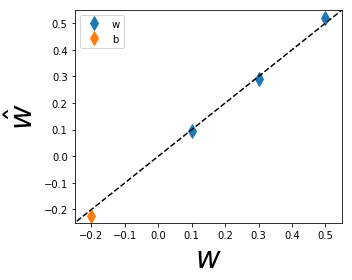

In [186]:
print(wb_[-1][1])

f,axarr = plt.subplots(1,figsize=[5,4])
ax = axarr
ax.plot([0.3,0.5,0.1],wb_[-1][0][0],'d',ms=10)
ax.plot(-0.2,wb_[-1][1],'d',ms=10)

ax.plot([-1.4,1.4],[-1.4,1.4],'k--')
ax.axis([-0.25,0.55,-0.25,0.55])
ax.set_ylabel(r'$\hat{w}$',fontsize=30)
ax.set_xlabel(r'$w$',fontsize=30)
ax.legend(['w','b'],loc=2,numpoints=1)
plt.tight_layout()
plt.show()

# Hands-on .3

# Linear Regression

## $$f(x_i) = w^Tx_i +b$$
## $$y_i = f(x_i) + \epsilon_i$$

# Boston housing dataset

The Boston Housing dataset is a relatively small dataset (506 samples), containing information concerning housing in the area of Boston Massachusetts. There are 13 predictors and the target variable is the median value of owner-occupied homes in $1000's 

In [ ]:
# TODO --------- SHOW EXAMPLES HOW DATA LOOKS LIKE PANDAS

In [187]:
boston = datasets.load_boston()
x_data = preprocessing.StandardScaler().fit_transform(boston.data)
y_data = boston.target
y_data = y_data.reshape(y_data.shape + (1,))

In [190]:
g = tf.Graph()
with g.as_default():
    # placeholders here


    with tf.name_scope('inference') as scope:

    with tf.name_scope('loss') as scope:

    with tf.name_scope('train') as scope:


    with tf.Session() as sess:
        # initialize variables
        
        for step in range(200):
            # run training and get MSE



In [ ]:
print()"MSE = {}".format(MSE))